In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
!pip install umap-learn
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=e6c68d7d233766fc8bc70a39788f9c9ec2d19832887085342bb2582bd64ec873
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
# Load the data
df = pd.read_csv('/content/electricityConsumptionAndProductioction.csv')
df.describe()
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [5]:
# Convert 'DateTime' to datetime format and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the missing values information
missing_values

Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [10]:
# Getting a statistical summary of the dataset
statistical_summary = df.describe()
statistical_summary

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000
mean,6707.924889,6543.770478,1293.468590,785.700723,1801.603149,1181.630017,1270.038236,151.524094,58.730828
std,1034.961146,1005.486125,237.348752,681.508967,678.981785,422.487653,306.550193,222.768784,13.363835
min,4081.000000,3315.000000,612.000000,-26.000000,175.000000,213.000000,279.000000,0.000000,18.000000
25%,5895.750000,5833.000000,1349.000000,226.000000,1310.000000,881.000000,1080.000000,0.000000,49.000000
50%,6686.000000,6492.000000,1386.000000,577.000000,1708.000000,1216.000000,1254.000000,2.000000,61.000000
75%,7434.000000,7210.000000,1409.000000,1195.250000,2184.000000,1502.000000,1467.000000,268.000000,68.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4359.000000,2141.000000,2537.000000,869.000000,89.000000


In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [11]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=3, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(umap_result)

# Add cluster information to the UMAP results
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
umap_df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


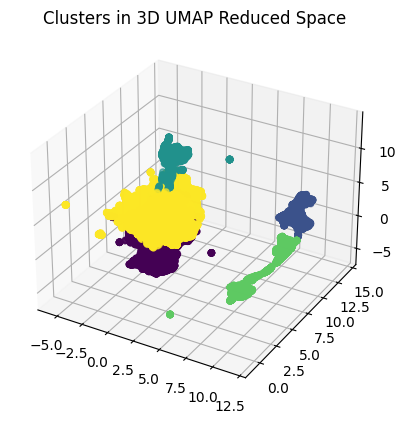

In [13]:
# 3D Scatter plot of the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(umap_df['UMAP_1'], umap_df['UMAP_2'], umap_df['UMAP_3'], c=umap_df['Cluster'], cmap='viridis')
plt.title('Clusters in 3D UMAP Reduced Space')
plt.show()

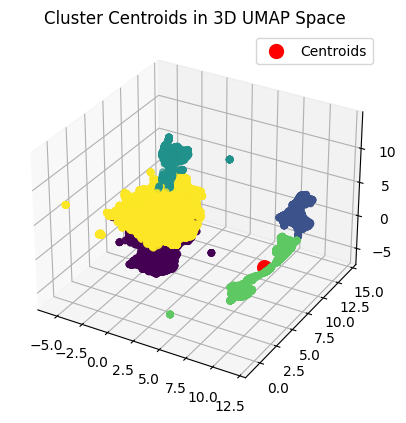

In [14]:
# Calculate the centroids
centroids = kmeans.cluster_centers_

# Plotting centroids in the 3D UMAP space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_df['UMAP_1'], umap_df['UMAP_2'], umap_df['UMAP_3'], c=umap_df['Cluster'], cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, label='Centroids')
plt.title('Cluster Centroids in 3D UMAP Space')
plt.legend()
plt.show()

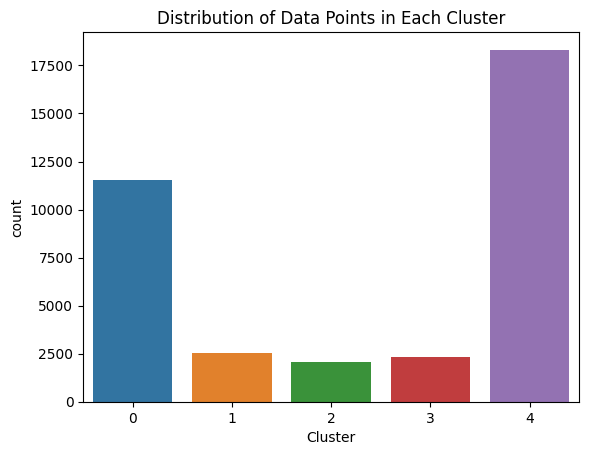

In [16]:
import seaborn as sns
# Count plot of clusters
sns.countplot(x='Cluster', data=umap_df)
plt.title('Distribution of Data Points in Each Cluster')
plt.show()

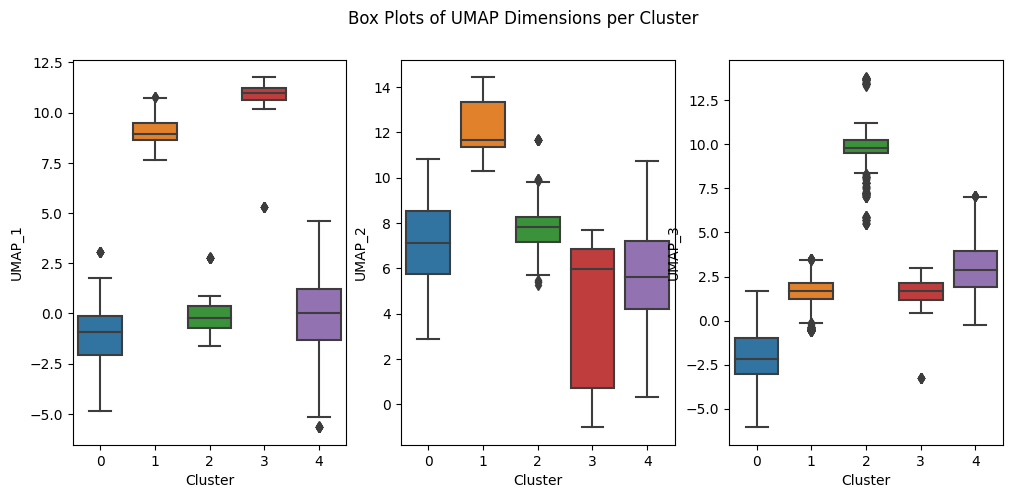

In [17]:
import seaborn as sns
# Box plot for each dimension per cluster
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='UMAP_1', data=umap_df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='UMAP_2', data=umap_df)
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='UMAP_3', data=umap_df)
plt.suptitle('Box Plots of UMAP Dimensions per Cluster')
plt.show()

In [24]:
# Apply PCA for feature extraction
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_data)

# Prepare data for classification
labels = clusters
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.3, random_state=42)

from sklearn.metrics import classification_report, accuracy_score
# Train a classifier (Random Forest)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)

Accuracy: 0.8417331399564902
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3410
           1       0.61      0.51      0.56       792
           2       0.74      0.73      0.73       632
           3       0.77      0.82      0.80       713
           4       0.86      0.88      0.87      5485

    accuracy                           0.84     11032
   macro avg       0.78      0.76      0.77     11032
weighted avg       0.84      0.84      0.84     11032

